# Machine cell formation for dynamic part population considering part operation trade-off and worker assignment using simulated annealing-based genetic algorithm
This notebook is for implementation of a metaheuristic algorith for Machine cell formation for dynamic part population 
considering part operation trade-off and worker assignment.

In [9]:
import numpy as np
import pygad
import json
import sys

In [51]:
from pandas import DataFrame as df

In [11]:
from Model import Model

In [15]:
def convert_ndarray_to_list(data):
    if isinstance(data, np.ndarray):
        return data.tolist()
    elif isinstance(data, dict):
        return {key: convert_ndarray_to_list(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [convert_ndarray_to_list(item) for item in data]
    return data

In [16]:
def convert_list_to_ndarray(data):
    if isinstance(data, list):
        return np.array([convert_list_to_ndarray(item) for item in data])
    elif isinstance(data, dict):
        return {key: convert_list_to_ndarray(value) for key, value in data.items()}
    return data

In [17]:
def read_dict_from_file(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return convert_list_to_ndarray(data)

In [18]:
def write_dict_to_file(data, filename):
    with open(filename, 'w') as file:
        json.dump(convert_ndarray_to_list(data), file)

In [121]:
mod = Model(cell_count=6, machine_count=7,worker_count=8,part_count=9)

In [122]:
# write_dict_to_file(mod.ModelParameters, 'Params4_cell_cell_count=6, machine_count=7,worker_count=8,part_count=9.json')

In [123]:
params = read_dict_from_file('Params4_cell_cell_count=6, machine_count=7,worker_count=8,part_count=9.json')

In [124]:
mod.ModelParameters = params.copy()

In [125]:
ga_model = pygad.GA(num_generations=30,
                       num_parents_mating=10,
                       fitness_func=mod.fitness_func,
                       initial_population=np.reshape(mod.generate_population(80), (80,mod.reshape_param)),
                       crossover_type=mod.crossover_func,
                       mutation_type=mod.mutation_func,
                       gene_type=int,
                       mutation_probability=0.1)

In [109]:
ga_model.run()

In [110]:
solution, solution_fitness, solution_idx = ga_model.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [2 3 3 6 2 3 2 7 2 7 3 6 3 6 1 1 4 3 1 7 7 8 6 6 8 9 6 6 8 9 6 6 6 6 8 3 0
 2 3 2 4 7 7 1 4 7 5 4 5 4 2 1 2 5 6 5 4 7 5 3 4 5 1 1 7 1 3 7 1 7 4 5 7 3
 3 7 4 5 3 4 0 6 9 7 0 0 6 6 8 8 8 8 0 0 0 0 0 6 6 2 3 2 3 6 2 3 7 5 3 6 4
 5 6 1 3 6 4 5 2 1]
Fitness value of the best solution = -210620.22565357995


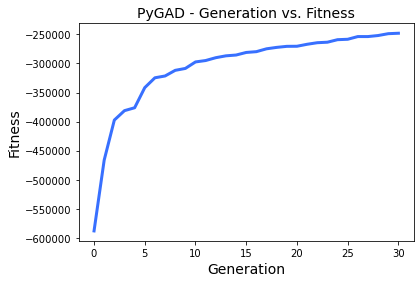

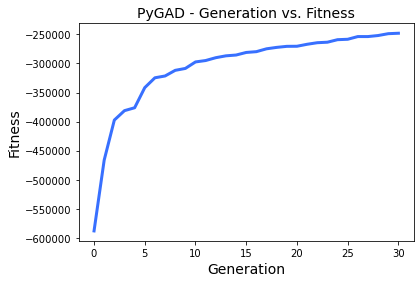

In [99]:
ga_model.plot_fitness()

In [100]:
temp01 = np.reshape(solution, (mod.solution_shape[0],mod.solution_shape[1]*mod.solution_shape[2]*mod.solution_shape[3]))

In [101]:
temp01

array([[2, 7, 4, 5, 2, 6, 4, 2, 7, 7, 7, 1, 4, 5, 5, 4, 7, 7, 4, 3, 9, 2,
        6, 5, 4, 6, 2, 0, 4, 4, 2, 0, 9, 8, 2, 0, 0, 1, 5, 4, 1, 2, 1, 2,
        1, 1, 3, 2, 2, 7, 2, 2, 6, 2, 2, 2, 6, 2, 5, 4],
       [4, 6, 4, 8, 1, 1, 5, 6, 5, 6, 4, 6, 1, 1, 4, 6, 6, 4, 3, 5, 3, 4,
        6, 6, 4, 5, 8, 2, 9, 5, 3, 4, 0, 2, 0, 2, 0, 2, 4, 7, 1, 4, 1, 5,
        7, 5, 6, 2, 6, 3, 1, 4, 7, 5, 6, 2, 6, 2, 7, 6]])

In [111]:
df(temp01).to_csv('Solutions\Solution16.csv', header=False, index=False)

In [103]:
np.reshape(solution, (mod.solution_shape[0],mod.solution_shape[1],mod.solution_shape[2],mod.solution_shape[3]))

array([[[[2, 7],
         [4, 5],
         [2, 6],
         [4, 2],
         [7, 7],
         [7, 1],
         [4, 5],
         [5, 4],
         [7, 7],
         [4, 3]],

        [[9, 2],
         [6, 5],
         [4, 6],
         [2, 0],
         [4, 4],
         [2, 0],
         [9, 8],
         [2, 0],
         [0, 1],
         [5, 4]],

        [[1, 2],
         [1, 2],
         [1, 1],
         [3, 2],
         [2, 7],
         [2, 2],
         [6, 2],
         [2, 2],
         [6, 2],
         [5, 4]]],


       [[[4, 6],
         [4, 8],
         [1, 1],
         [5, 6],
         [5, 6],
         [4, 6],
         [1, 1],
         [4, 6],
         [6, 4],
         [3, 5]],

        [[3, 4],
         [6, 6],
         [4, 5],
         [8, 2],
         [9, 5],
         [3, 4],
         [0, 2],
         [0, 2],
         [0, 2],
         [4, 7]],

        [[1, 4],
         [1, 5],
         [7, 5],
         [6, 2],
         [6, 3],
         [1, 4],
         [7, 5],
         [6, 2],
  